In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import ttest_rel

## Load Data

###  QIDS

In [3]:
bl_qids = pd.read_csv('BL_QIDS.csv')
bfc_qids = pd.read_csv('BFC_QIDS.csv')
kmeans_qids = pd.read_csv('Qid_kmeans.csv')
hrc_qids = pd.read_csv('Qid_HRC.csv')

### NDCG

In [4]:
# Baseline

bl_ndcg = pd.read_csv('BL_NDCG.csv')
bl_ndcg.columns=['bl_ndcg@5']

# BFC

bfc_ndcg = pd.read_csv('BFC_NDCG.csv')
bfc_ndcg.columns=['bfc_ndcg@5']

# KMeans

kmeans_sc_ndcg = pd.read_csv('ndcg_sc_kmeans.csv')
kmeans_sc_ndcg.columns=['kmeans_sc_ndcg@5']

kmeans_co_ndcg = pd.read_csv('ndcg_co_kmeans.csv') 
kmeans_co_ndcg.columns=['kmeans_co_ndcg@5']

kmeans_cf_ndcg = pd.read_csv('ndcg_cf_kmeans.csv')
kmeans_cf_ndcg.columns=['kmeans_cf_ndcg@5']

# Hierarchical

hrc_sc_ndcg = pd.read_csv('ndcg_sc_HRC.csv')
hrc_sc_ndcg.columns=['hrc_sc_ndcg@5']

hrc_co_ndcg = pd.read_csv('ndcg_co_HRC.csv') 
hrc_co_ndcg.columns=['hrc_co_ndcg@5']

hrc_cf_ndcg = pd.read_csv('ndcg_cf_HRC.csv')
hrc_cf_ndcg.columns=['hrc_cf_ndcg@5']


### MRR

In [5]:
# Baseline

bl_mrr = pd.read_csv('BL_MRR.csv')
bl_mrr.columns=['bl_mrr@100']

# BFC

bfc_mrr = pd.read_csv('BFC_MRR.csv')
bfc_mrr.columns=['bfc_mrr@100']

# KMeans

kmeans_sc_mrr = pd.read_csv('mrr_sc_kmeans.csv')
kmeans_sc_mrr.columns=['kmeans_sc_mrr@100']

kmeans_co_mrr = pd.read_csv('mrr_co_kmeans.csv') 
kmeans_co_mrr.columns=['kmeans_co_mrr@100']

kmeans_cf_mrr = pd.read_csv('mrr_cf_kmeans.csv')
kmeans_cf_mrr.columns=['kmeans_cf_mrr@100']

# Hierarchical

hrc_sc_mrr = pd.read_csv('mrr_sc_HRC.csv')
hrc_sc_mrr.columns=['hrc_sc_mrr@100']

hrc_co_mrr = pd.read_csv('mrr_co_HRC.csv') 
hrc_co_mrr.columns=['hrc_co_mrr@100']

hrc_cf_mrr = pd.read_csv('mrr_cf_HRC.csv')
hrc_cf_mrr.columns=['hrc_cf_mrr@100']


## Combine Data

### NDCG

In [6]:
frame_ndcg = [bl_ndcg, bfc_ndcg,
              kmeans_sc_ndcg, kmeans_co_ndcg, kmeans_cf_ndcg,
              hrc_sc_ndcg, hrc_co_ndcg, hrc_cf_ndcg]

ndcg_df = bl_qids.join(frame_ndcg)

### MRR

In [7]:
frame_mrr = [bl_mrr, bfc_mrr,
              kmeans_sc_mrr, kmeans_co_mrr, kmeans_cf_mrr,
              hrc_sc_mrr, hrc_co_mrr, hrc_cf_mrr]

mrr_df = bl_qids.join(frame_mrr)
mrr_df.head()

,Q_ID,bl_mrr@100,bfc_mrr@100,kmeans_sc_mrr@100,kmeans_co_mrr@100,kmeans_cf_mrr@100,hrc_sc_mrr@100,hrc_co_mrr@100,hrc_cf_mrr@100
0,7968.0,1.000000,1.000000,1.00,1.0,1.0,1.00,1.0,1.000000
1,7979.0,1.000000,1.000000,1.00,1.0,1.0,1.00,1.0,1.000000
2,7993.0,1.000000,1.000000,1.00,1.0,1.0,1.00,1.0,1.000000
3,7995.0,0.333333,0.200000,0.25,1.0,1.0,1.00,1.0,0.500000
4,8002.0,0.333333,0.333333,1.00,1.0,1.0,0.25,1.0,0.333333


## Compute Mean NDCG

In [8]:
print('Baseline Mean NDCG@5: ', np.mean(ndcg_df['bl_ndcg@5']).round(3))
print('BFC Mean NDCG@5: ', np.mean(ndcg_df['bfc_ndcg@5']).round(3))
print('\n')
print('K-Means Selective Cluster Mean NDCG@5: ', np.mean(ndcg_df['kmeans_sc_ndcg@5']).round(3))
print('K-Means Cluster Oracle Mean NDCG@5: ', np.mean(ndcg_df['kmeans_co_ndcg@5']).round(3))
print('K-Means Cluster Fusion Mean NDCG@5: ', np.mean(ndcg_df['kmeans_cf_ndcg@5']).round(3))
print('\n')
print('Hierarchical Selective Cluster NDCG@5: ', np.mean(ndcg_df['hrc_sc_ndcg@5']).round(3))
print('Hierarchical Cluster Oracle Mean NDCG@5: ', np.mean(ndcg_df['hrc_co_ndcg@5']).round(3))
print('Hierarchical Cluster Fusion Mean NDCG@5: ', np.mean(ndcg_df['hrc_cf_ndcg@5']).round(3))

Baseline Mean NDCG@5:  0.417
BFC Mean NDCG@5:  0.385


K-Means Selective Cluster Mean NDCG@5:  0.385
K-Means Cluster Oracle Mean NDCG@5:  0.557
K-Means Cluster Fusion Mean NDCG@5:  0.409


Hierarchical Selective Cluster NDCG@5:  0.387
Hierarchical Cluster Oracle Mean NDCG@5:  0.559
Hierarchical Cluster Fusion Mean NDCG@5:  0.404


## Compute Mean MRR

In [9]:
print('Baseline Mean MRR@100: ', np.mean(mrr_df['bl_mrr@100']).round(3))
print('BFC Mean MRR@100: ', np.mean(mrr_df['bfc_mrr@100']).round(3))
print('\n')
print('K-Means Selective Cluster Mean MRR@100: ', np.mean(mrr_df['kmeans_sc_mrr@100']).round(3))
print('K-Means Cluster Oracle Mean MRR@100: ', np.mean(mrr_df['kmeans_co_mrr@100']).round(3))
print('K-Means Cluster Fusion Mean MRR@100: ', np.mean(mrr_df['kmeans_cf_mrr@100']).round(3))
print('\n')
print('Hierarchical Selective Cluster MRR@100: ', np.mean(mrr_df['hrc_sc_mrr@100']).round(3))
print('Hierarchical Cluster Oracle Mean MRR@100: ', np.mean(mrr_df['hrc_co_mrr@100']).round(3))
print('Hierarchical Cluster Fusion Mean MRR@100: ', np.mean(mrr_df['hrc_cf_mrr@100']).round(3))

Baseline Mean MRR@100:  0.568
BFC Mean MRR@100:  0.527


K-Means Selective Cluster Mean MRR@100:  0.538
K-Means Cluster Oracle Mean MRR@100:  0.727
K-Means Cluster Fusion Mean MRR@100:  0.557


Hierarchical Selective Cluster MRR@100:  0.535
Hierarchical Cluster Oracle Mean MRR@100:  0.727
Hierarchical Cluster Fusion Mean MRR@100:  0.556


# Paired T-Test

In [16]:
print("NDCG T-TEST: ", ttest_rel(ndcg_df['kmeans_co_ndcg@5'], ndcg_df['hrc_co_ndcg@5']))
print("MRR T-TEST: ", ttest_rel(mrr_df['kmeans_co_mrr@100'], mrr_df['hrc_co_mrr@100']))

NDCG T-TEST:  Ttest_relResult(statistic=-0.4396807207710035, pvalue=0.6602245520308161)
MRR T-TEST:  Ttest_relResult(statistic=0.07370536648770601, pvalue=0.9412535457583312)


## Compute and Plot Failure Level

### NDCG

In [9]:
ndcg_df['failure_level_ndcg@5'] = (ndcg_df['bl_ndcg@5'] - ndcg_df['bfc_ndcg@5']).round(1)

ndcg_bl = ndcg_df.groupby('failure_level_ndcg@5', as_index=False)['bl_ndcg@5'].mean()
ndcg_bfc = ndcg_df.groupby('failure_level_ndcg@5', as_index=False)['bfc_ndcg@5'].mean()

ndcg_sc_kmeans = ndcg_df.groupby('failure_level_ndcg@5', as_index=False)['kmeans_sc_ndcg@5'].mean()
ndcg_co_kmeans = ndcg_df.groupby('failure_level_ndcg@5', as_index=False)['kmeans_co_ndcg@5'].mean()
ndcg_cf_kmeans = ndcg_df.groupby('failure_level_ndcg@5', as_index=False)['kmeans_cf_ndcg@5'].mean()

ndcg_sc_hrc = ndcg_df.groupby('failure_level_ndcg@5', as_index=False)['hrc_sc_ndcg@5'].mean()
ndcg_co_hrc = ndcg_df.groupby('failure_level_ndcg@5', as_index=False)['hrc_co_ndcg@5'].mean()
ndcg_cf_hrc = ndcg_df.groupby('failure_level_ndcg@5', as_index=False)['hrc_cf_ndcg@5'].mean()


#### KMeans

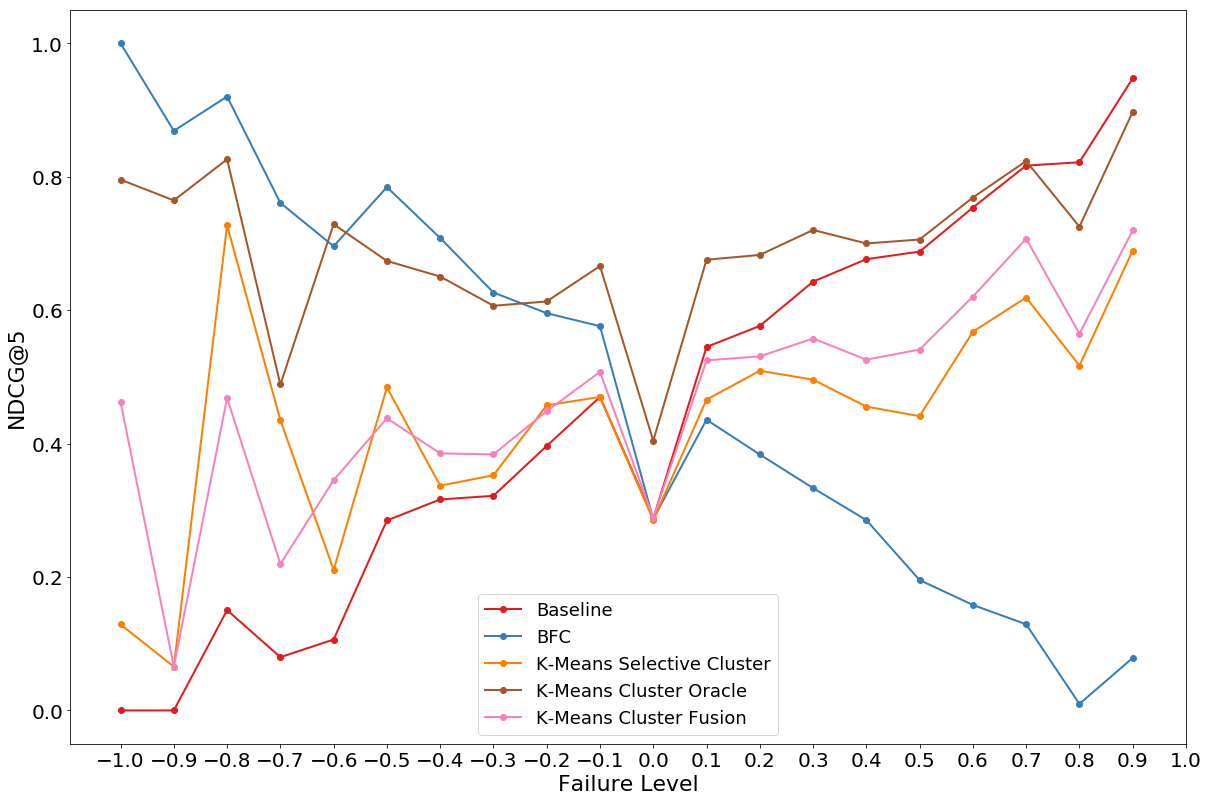

In [10]:
plt.figure(figsize=(20, 13.5))

plt.plot(ndcg_bl['failure_level_ndcg@5'], ndcg_bl['bl_ndcg@5'], 'o-', linewidth=2, label='Baseline', color='#e41a1c')
plt.plot(ndcg_bfc['failure_level_ndcg@5'], ndcg_bfc['bfc_ndcg@5'], 'o-', linewidth=2, label='BFC', color='#377eb8')

plt.plot(ndcg_sc_kmeans['failure_level_ndcg@5'], ndcg_sc_kmeans['kmeans_sc_ndcg@5'], 'o-', linewidth=2, label='K-Means Selective Cluster', color='#ff7f00')
plt.plot(ndcg_co_kmeans['failure_level_ndcg@5'], ndcg_co_kmeans['kmeans_co_ndcg@5'], 'o-', linewidth=2, label='K-Means Cluster Oracle', color='#a65628')
plt.plot(ndcg_cf_kmeans['failure_level_ndcg@5'], ndcg_cf_kmeans['kmeans_cf_ndcg@5'], 'o-', linewidth=2, label='K-Means Cluster Fusion', color='#f781bf')

plt.xticks(np.arange(-1, 1.1, 0.1), fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Failure Level', fontsize=22)
plt.ylabel('NDCG@5', fontsize=22)

plt.legend(fontsize=18)
plt.savefig('kmeans_ndcg_v2.png')

plt.show()


#### Hierarchical

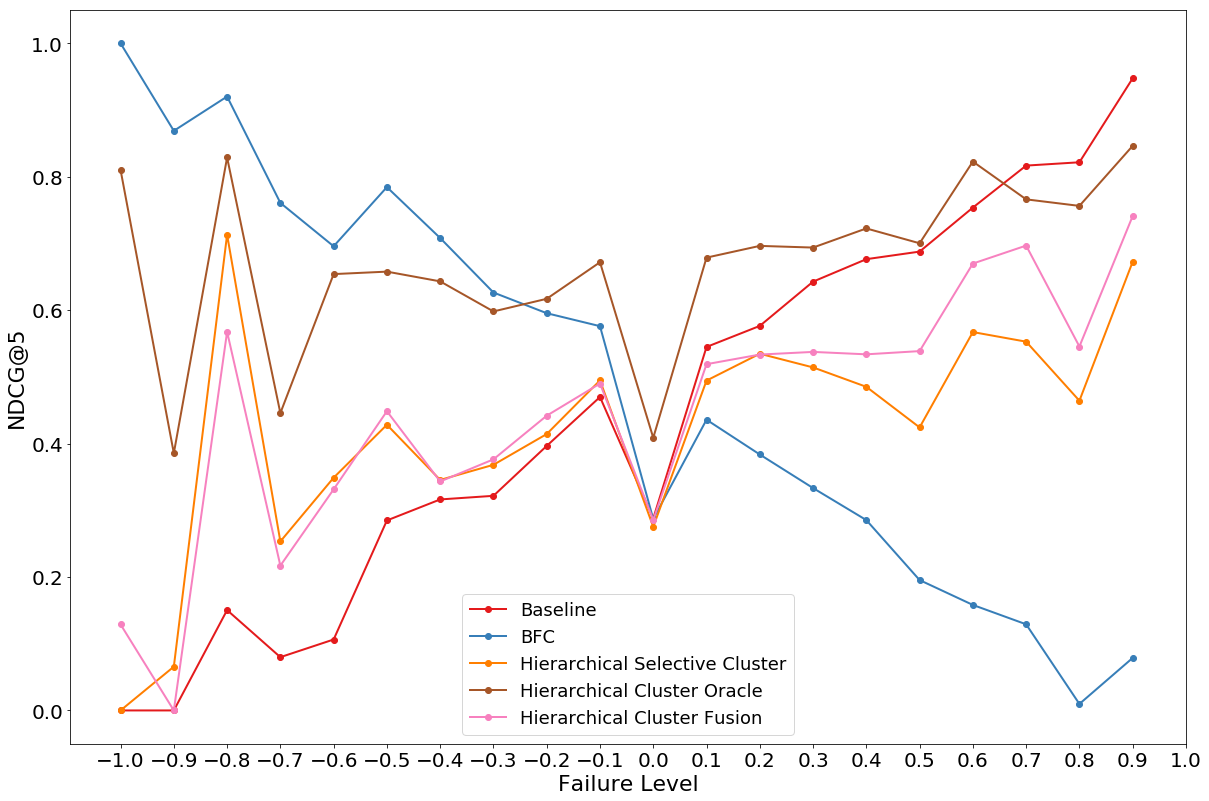

In [11]:
plt.figure(figsize=(20, 13.5))

plt.plot(ndcg_bl['failure_level_ndcg@5'], ndcg_bl['bl_ndcg@5'], 'o-', linewidth=2, label='Baseline', color='#e41a1c')
plt.plot(ndcg_bfc['failure_level_ndcg@5'], ndcg_bfc['bfc_ndcg@5'], 'o-', linewidth=2, label='BFC', color='#377eb8')

plt.plot(ndcg_sc_hrc['failure_level_ndcg@5'], ndcg_sc_hrc['hrc_sc_ndcg@5'], 'o-', linewidth=2, label='Hierarchical Selective Cluster', color='#ff7f00')
plt.plot(ndcg_co_hrc['failure_level_ndcg@5'], ndcg_co_hrc['hrc_co_ndcg@5'], 'o-', linewidth=2, label='Hierarchical Cluster Oracle', color='#a65628')
plt.plot(ndcg_cf_hrc['failure_level_ndcg@5'], ndcg_cf_hrc['hrc_cf_ndcg@5'], 'o-', linewidth=2, label='Hierarchical Cluster Fusion', color='#f781bf')

plt.xticks(np.arange(-1, 1.1, 0.1), fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Failure Level', fontsize=22)
plt.ylabel('NDCG@5', fontsize=22)

plt.legend(fontsize=18)
plt.savefig('hrc_ndcg_v2.png')

plt.show()

### MRR

In [12]:
mrr_df['failure_level_mrr@100'] = (mrr_df['bl_mrr@100'] - mrr_df['bfc_mrr@100']).round(1)

mrr_bl = mrr_df.groupby('failure_level_mrr@100', as_index=False)['bl_mrr@100'].mean()
mrr_bfc = mrr_df.groupby('failure_level_mrr@100', as_index=False)['bfc_mrr@100'].mean()

mrr_sc_kmeans = mrr_df.groupby('failure_level_mrr@100', as_index=False)['kmeans_sc_mrr@100'].mean()
mrr_co_kmeans = mrr_df.groupby('failure_level_mrr@100', as_index=False)['kmeans_co_mrr@100'].mean()
mrr_cf_kmeans = mrr_df.groupby('failure_level_mrr@100', as_index=False)['kmeans_cf_mrr@100'].mean()

mrr_sc_hrc = mrr_df.groupby('failure_level_mrr@100', as_index=False)['hrc_sc_mrr@100'].mean()
mrr_co_hrc = mrr_df.groupby('failure_level_mrr@100', as_index=False)['hrc_co_mrr@100'].mean()
mrr_cf_hrc = mrr_df.groupby('failure_level_mrr@100', as_index=False)['hrc_cf_mrr@100'].mean()

#### KMeans

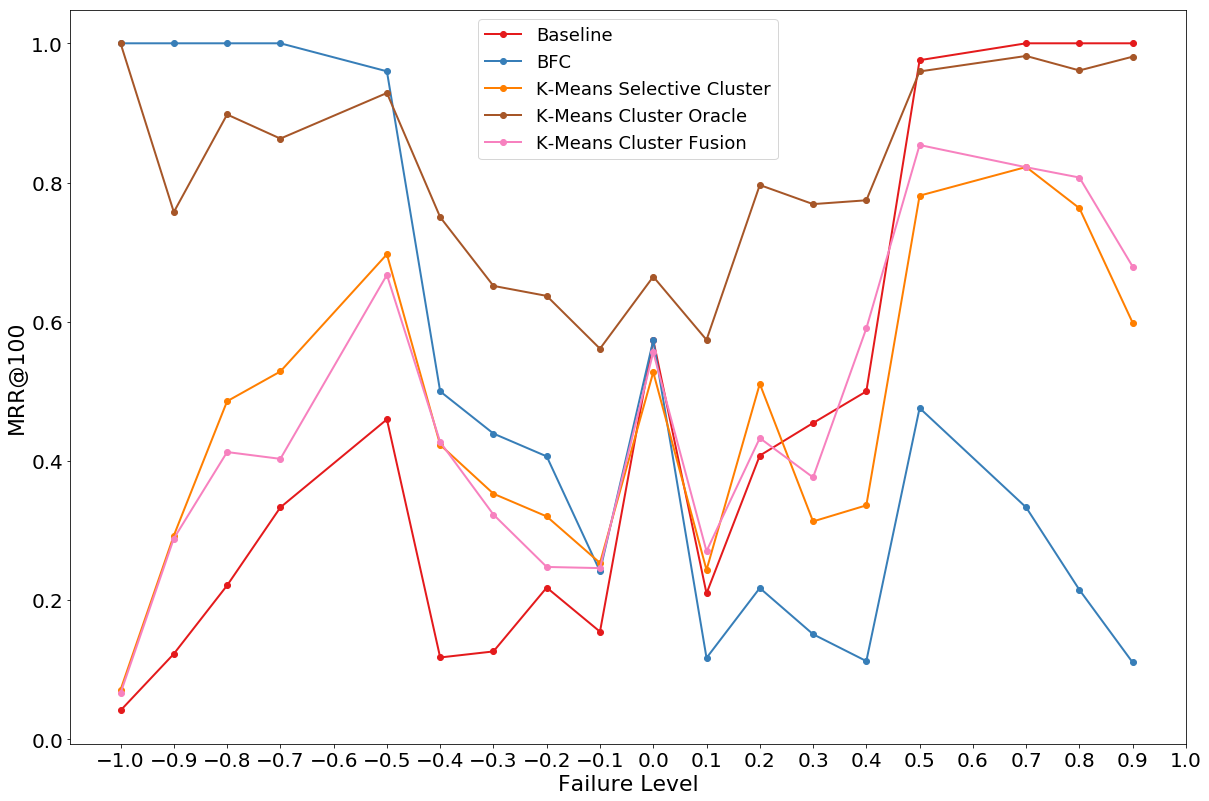

In [13]:
plt.figure(figsize=(20, 13.5))

plt.plot(mrr_bl['failure_level_mrr@100'], mrr_bl['bl_mrr@100'], 'o-', linewidth=2, label='Baseline', color='#e41a1c')
plt.plot(mrr_bfc['failure_level_mrr@100'], mrr_bfc['bfc_mrr@100'], 'o-', linewidth=2, label='BFC', color='#377eb8')

plt.plot(mrr_sc_kmeans['failure_level_mrr@100'], mrr_sc_kmeans['kmeans_sc_mrr@100'], 'o-', linewidth=2, label='K-Means Selective Cluster', color='#ff7f00')
plt.plot(mrr_co_kmeans['failure_level_mrr@100'], mrr_co_kmeans['kmeans_co_mrr@100'], 'o-', linewidth=2, label='K-Means Cluster Oracle', color='#a65628')
plt.plot(mrr_cf_kmeans['failure_level_mrr@100'], mrr_cf_kmeans['kmeans_cf_mrr@100'], 'o-', linewidth=2, label='K-Means Cluster Fusion', color='#f781bf')

plt.xticks(np.arange(-1, 1.1, 0.1), fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Failure Level', fontsize=22)
plt.ylabel('MRR@100', fontsize=22)

plt.legend(fontsize=18)
plt.savefig('kmeans_mrr_v2.png')

plt.show()


#### Hierarchical

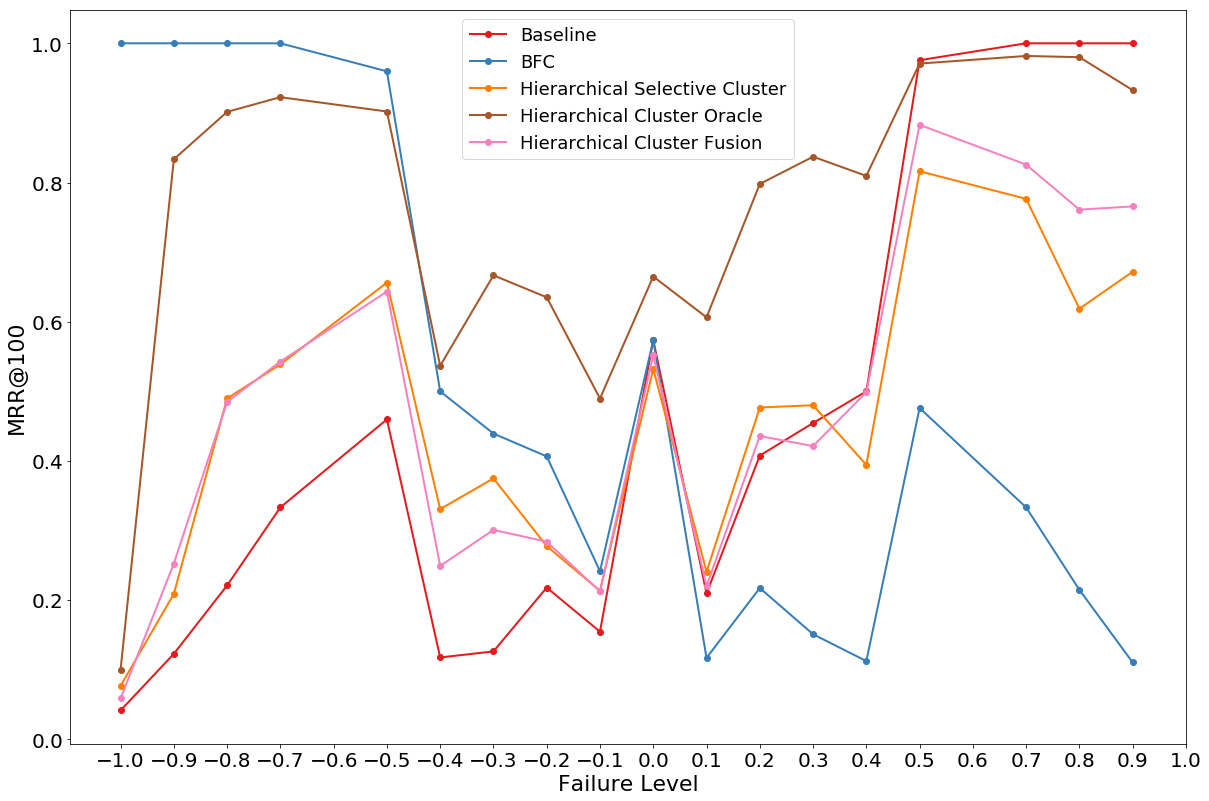

In [14]:
plt.figure(figsize=(20, 13.5))

plt.plot(mrr_bl['failure_level_mrr@100'], mrr_bl['bl_mrr@100'], 'o-', linewidth=2, label='Baseline', color='#e41a1c')
plt.plot(mrr_bfc['failure_level_mrr@100'], mrr_bfc['bfc_mrr@100'], 'o-', linewidth=2, label='BFC', color='#377eb8')

plt.plot(mrr_sc_hrc['failure_level_mrr@100'], mrr_sc_hrc['hrc_sc_mrr@100'], 'o-', linewidth=2, label='Hierarchical Selective Cluster', color='#ff7f00')
plt.plot(mrr_co_hrc['failure_level_mrr@100'], mrr_co_hrc['hrc_co_mrr@100'], 'o-', linewidth=2, label='Hierarchical Cluster Oracle', color='#a65628')
plt.plot(mrr_cf_hrc['failure_level_mrr@100'], mrr_cf_hrc['hrc_cf_mrr@100'], 'o-', linewidth=2, label='Hierarchical Cluster Fusion', color='#f781bf')

plt.xticks(np.arange(-1, 1.1, 0.1), fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Failure Level', fontsize=22)
plt.ylabel('MRR@100', fontsize=22)

plt.legend(fontsize=18)
plt.savefig('hrc_mrr_v2.png')

plt.show()
